# Example 7.10: Exact intervals for quantiles
General comments:
To quickly get started with the example, we used Open AI's Chat GPT to translate code.

This was done by giving Chat GPT the example file "example 7-8.ipynb" from https://canvas.kth.se/courses/50421/files/folder/Projects
along with the corresponding "R" code from https://people.kth.se/~hult/riskbook.html,
as to give Chat GPT an example of how to translate the code. Then we gave it the "Example 7-10 R code" and asked it to tranlate it into a jupyter notebook (with python 3 code in the cells).

The prompt given to Chat GPT:
"We want to translate R code into a jupyter notebook. To do that we have an example of how the notebook should look
like. The file "Example 7-8.ipynb" is the tranlated code of the following R code:

---Example 7.8 R code written out---

Now we want you to translate the following R code into a .ipynb file, using the example above as a guide.

---Example 7.10 R code written out---"

Now that we had received a file "Example 7-10.ipynb" from Chat GPT, we could first make sure that the results/code are correct.
It was correct, so we only added comments (markdown cells) to explain the procedure, results and our interpretation.

In [887]:
#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

In [888]:
# Initialize matrices
resmat = np.zeros((4, 100))
samples = np.zeros((2, 200))

# Generate samples and calculate quantiles
for i in range(100):
    samples[0, :] = -np.sort(-np.random.normal(size=200))  # Normal samples in decreasing order
    samples[1, :] = -np.sort(-np.random.lognormal(size=200))  # Lognormal samples in decreasing order

    # Extract quantiles for normal samples
    resmat[0, i] = samples[0, 16]  # 17th largest
    resmat[1, i] = samples[0, 4]   # 5th largest

    # Extract quantiles for lognormal samples
    resmat[2, i] = samples[1, 16]  # 17th largest
    resmat[3, i] = samples[1, 4]   # 5th largest


Above we have created a matrix (resmat) containing the values for the confidence intervals for each iteration, 1-100, for both normal and lognormal samples. The confidence interval [x^17,200^ , x^5,200^] (where x are ordered) corresponds to a confidence interval for F^-1^(0.95) with confidence level approximately 95%. The fact that these specific values gives a 95% confidence interval comes from the binomial distribution of the points above F^-1^(0.95).

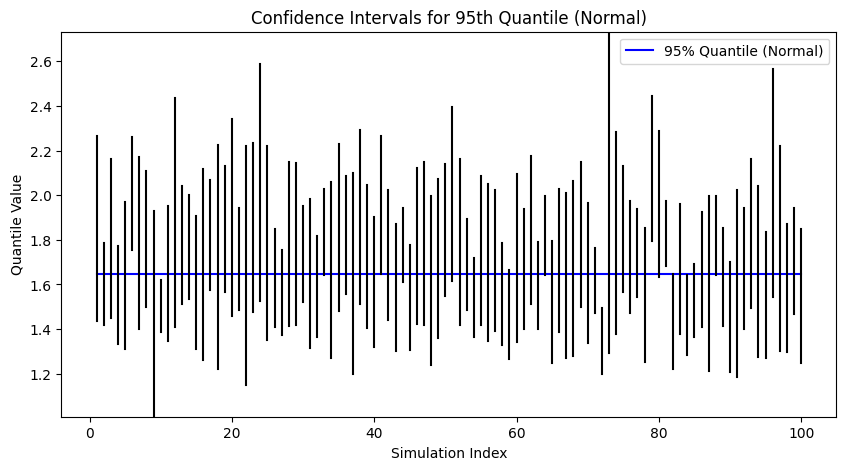

In [889]:
# Plot confidence intervals for normal samples
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), [norm.ppf(0.95)] * 100, 'b-', label='95% Quantile (Normal)')
for i in range(100):
    plt.plot([i+1, i+1], [resmat[0, i], resmat[1, i]], 'k-')

plt.ylim(np.min(resmat[0, :]), np.max(resmat[1, :]))
plt.xlabel('Simulation Index')
plt.ylabel('Quantile Value')
plt.title('Confidence Intervals for 95th Quantile (Normal)')
plt.legend()
plt.show()

What can be seen in the plot above for the normal distribution, we have the confidence intervals (vertical lines) with the top of the vertical lines corresponding to each x^5,200^ and the bottom corresponding to each x^17,200^. Here we see that each sample gives a different confidence interval. Imagine now if we instead of a given distribution we had some data X with 200 iid X_i, which we had ordered and we wanted to determine an interval for the 95% quantile. We then take the 17:th largest and 5:th largest values, we could then construct a confidence interval using these values which would have a confidence interval of confidence interval 95%. But as can be seen in the plot, each sample is different, and some might not even contain the actual 95% quantile of the distribution. This shows the difficulty in estimating quantile values.
 

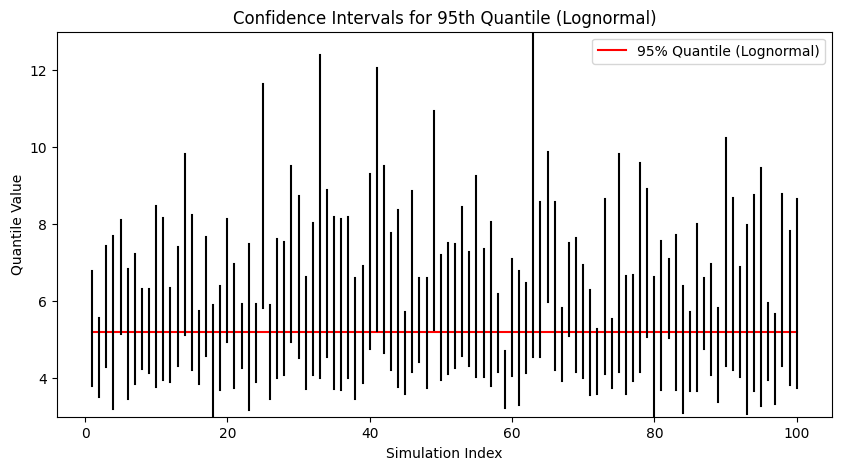

In [890]:
# Plot confidence intervals for lognormal samples
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), [lognorm.ppf(0.95, s=1)] * 100, 'r-', label='95% Quantile (Lognormal)')
for i in range(100):
    plt.plot([i+1, i+1], [resmat[2, i], resmat[3, i]], 'k-')

plt.ylim(np.min(resmat[2, :]), np.max(resmat[3, :]))
plt.xlabel('Simulation Index')
plt.ylabel('Quantile Value')
plt.title('Confidence Intervals for 95th Quantile (Lognormal)')
plt.legend()
plt.show()

Same conclusion as for the normal distribution can be drawn here about the difficulty of estimating quantile values for distributions. Each sample might give an entirely different confidence interval.

# Example 7.11: Bootstrap intervals for quantiles
General comments:
To quickly get started with the example, we used Open AI's Chat GPT to translate code.

This was done by giving Chat GPT "R" code from https://people.kth.se/~hult/riskbook.html, and then asking it to translate it into a jupyter notebook.

The prompt given to Chat GPT:
"We want you to translate the following R code into a python 3 script:

---Example 7.11 R code written out---"


Now that we had received the code we could first make sure that the results/code are correct.
Some minor changes was done to make plots a bit nicer, and for some reason it returned the negative values of the bootstrap confidence intervals. This was fixed, so that it has the same results as the original code.

We then added comments (markdown cells) to explain the procedure, results and our interpretation.

In [891]:
#Import needed packages
import numpy as np
import matplotlib.pyplot as plt

In [892]:
# Define functions

# Empirical quantile
def empquant(datavec, p):
    sorted_data = np.sort(datavec)[::-1]  # Sort in descending order
    return sorted_data[int(np.floor(len(sorted_data) * (1 - p)))]

# The bootstrap empirical quantile
def empquantboot(datavec, indvec, p):
    sorted_data = np.sort(datavec[indvec])[::-1]  # Sort sampled data in descending order
    return sorted_data[int(np.floor(len(sorted_data) * (1 - p)))]

# Generate a sample of empirical quantiles
def quantestsample(size, samplesize, p, S0, mu, sigma):
    vals = []
    for _ in range(size):
        simulated_data = S0 * (1 - np.random.lognormal(mean=mu, sigma=sigma, size=samplesize))
        vals.append(empquant(simulated_data, p))
    return np.array(vals)

#Generate a bootstrap distribution of empirical quantiles
def mybootdistr(datavec, rep, p):
    vals = []
    datasize = len(datavec)
    for _ in range(rep):
        indices = np.random.choice(range(datasize), size=datasize, replace=True)
        vals.append(empquantboot(datavec, indices, p))
    return np.array(vals)

#bootstrap confidence intervals
def mybootci(datavec, estim, rep, p, q):
    vals = estim - mybootdistr(datavec, rep, p)
    lower_bound = estim + empquant(vals, (1 - q) / 2)
    upper_bound = estim + empquant(vals, (1 + q) / 2)
    return np.array([lower_bound, upper_bound])


The functions above are used to calculate all needed quantiles and confidence intervals. Some things to note is that the methods are rather similar for both emperical and bootstrap. 

In [893]:

# Simulation parameters
nrows, ncols = 500, 500
S0 = 1
alpha = 0.05
mu = 0
sigma = 0.01

# Generate return matrix and negxvalmat
returnmat = np.random.lognormal(mean=mu, sigma=sigma, size=(nrows, ncols))
negxvalmat = S0 * (1 - returnmat)

# Quantile estimation
quantestvals = quantestsample(2000, 500, 0.95, S0, mu, sigma)

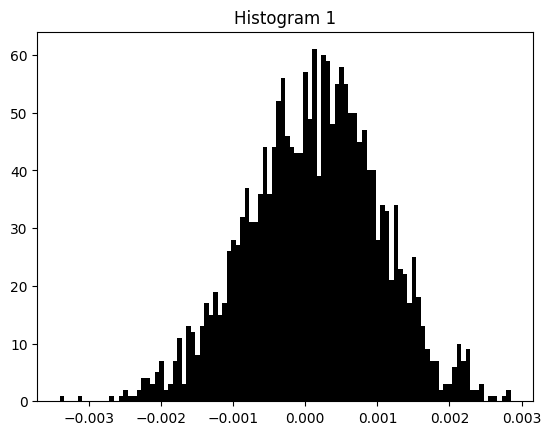

In [894]:
# Histogram 1: Quantile test values
plt.hist(0.01631400 - quantestvals, bins=100, color="black")
plt.title("Histogram 1")
plt.show()

The first histogram, shows a histogram of the difference between the analyticly determined theta and the emerically determied theta according to hat{theta}=L^[0.05n]+1,n^ for 2000 simulations.

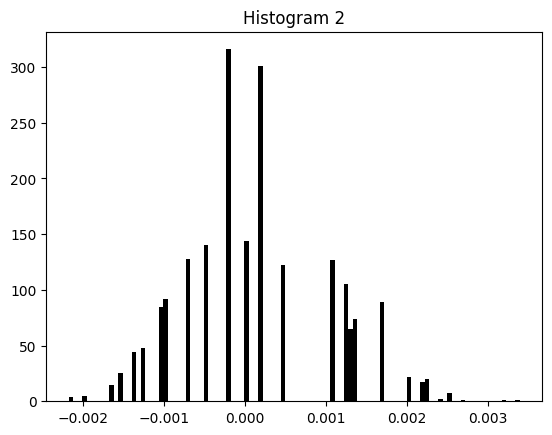

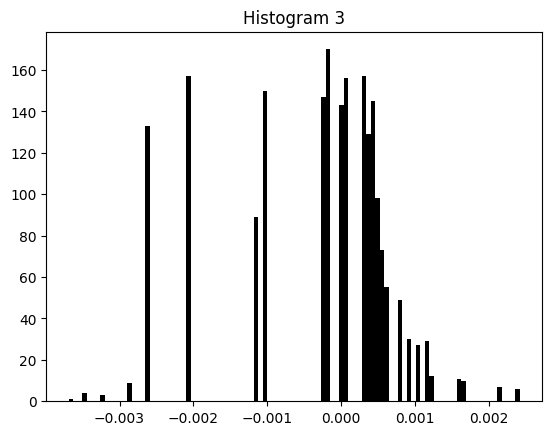

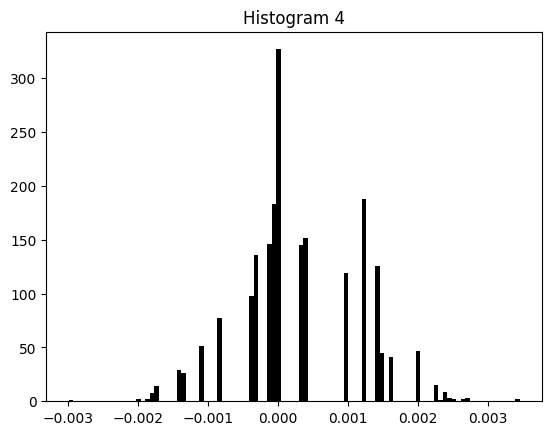

In [895]:
# Histogram 2: First row, 2000 bootstrap replications
plt.hist(empquant(negxvalmat[0], 0.95) - mybootdistr(negxvalmat[0], 2000, 0.95), bins=100, color="black")
plt.title("Histogram 2")
plt.show()

# Histogram 3: Second row, 2000 bootstrap replications
plt.hist(empquant(negxvalmat[1], 0.95) - mybootdistr(negxvalmat[1], 2000, 0.95), bins=100, color="black")
plt.title("Histogram 3")
plt.show()

# Histogram 4: Third row, 2000 bootstrap replications
plt.hist(empquant(negxvalmat[2], 0.95) - mybootdistr(negxvalmat[2], 2000, 0.95), bins=100, color="black")
plt.title("Histogram 4")
plt.show()

In these three plots we see that the bootstrap method removes a lot of information, but the general shape is the same as for the first histogram. This means that the accuracy of the nonparametric-bootstrap method for constructing confidence intervals is at least somewhat likely to be good. Since most of them are centered around 0 it seems to be that the bootstrap is unbiased.

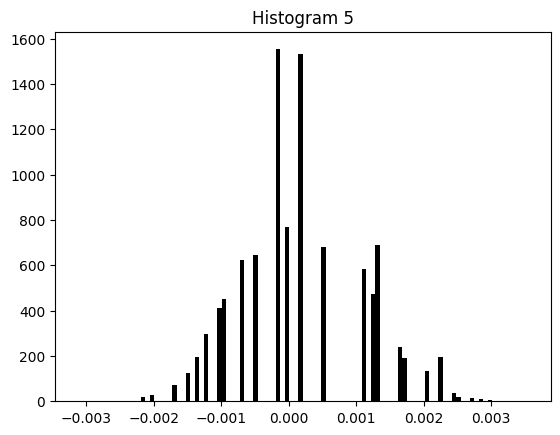

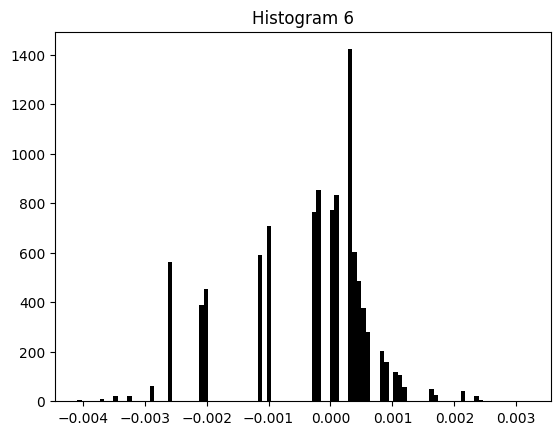

In [896]:
# Histogram 5: First row, 10000 bootstrap replications
plt.hist(empquant(negxvalmat[0], 0.95) - mybootdistr(negxvalmat[0], 10000, 0.95), bins=100, color="black")
plt.title("Histogram 5")
plt.show()

# Histogram 6: Second row, 10000 bootstrap replications
plt.hist(empquant(negxvalmat[1], 0.95) - mybootdistr(negxvalmat[1], 10000, 0.95), bins=100, color="black")
plt.title("Histogram 6")
plt.show()

Histogram 5-6 shows that even if we increase the amount of resampling, there isn't much difference or improvement, this is logical since the bootstrap method only has a certain number of samples to resample from, which will result in choosing just the same values again and again, which results in the bins becoming higher and higher, but in general the overall distribution of them will remain. To increase the spread and information about the distribution, one should be able to increase the amount of values to resample from, which would correspond to increasing ncols in the code.

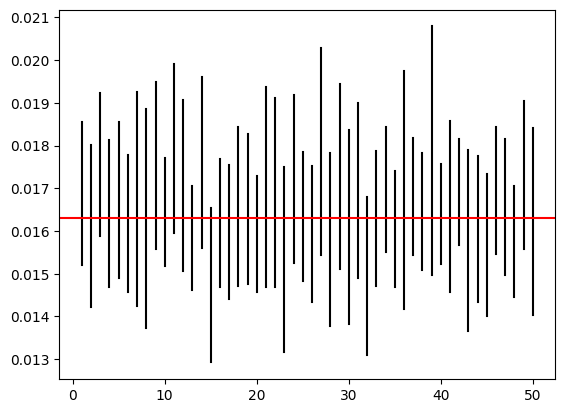

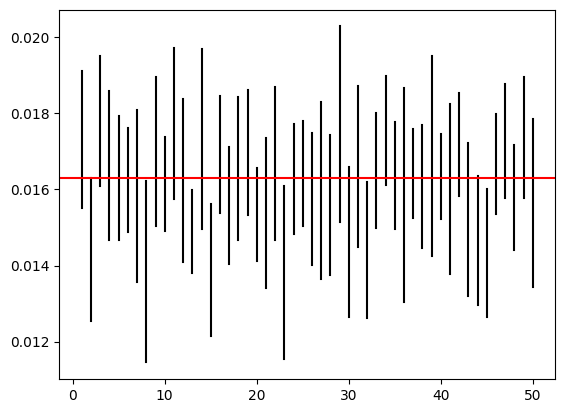

In [897]:

# Bootstrap confidence intervals
bootcis = np.zeros((100, 2))
for i in range(100):
    bootcis[i] = mybootci(negxvalmat[i], empquant(negxvalmat[i], 0.95), 2000, 0.95, 0.95)

exactcis = np.zeros((100, 2))
for i in range(100):
    sorted_data = np.sort(negxvalmat[i])[::-1]
    exactcis[i] = [sorted_data[34], sorted_data[15]]  # Indices adjusted for Python's 0-based indexing

# Plotting confidence intervals
plt.figure()
for i in range(50):
    plt.plot([i + 1, i + 1], [exactcis[i, 0], exactcis[i, 1]], 'k-')
plt.axhline(y=0.01631400, color='red', linestyle='-')
plt.show()

plt.figure()
for i in range(50):
    plt.plot([i + 1, i + 1], [bootcis[i, 0], bootcis[i, 1]], 'k-')
plt.axhline(y=0.01631400, color='red', linestyle='-')
plt.show()


Here the first plot is 50 exact confidence interval and the second is 50 non-parametric bootstrap confidence interval for the VaR0.05(V1-V0). We can see that they are really similar. We can then draw the conclusion that the bootstrap approximates rather well. 

# Example 8.4, 8.5, 8.8, 8.11
To quickly get started with the example, we used Open AI's Chat GPT to translate code.

The R code came from https://people.kth.se/~hult/riskbook.html, and instead of translating all the examples all at once, we decided to split it up. So the R code up until the last line in example 8.4 was first sent in, then exmaple 8.5 etc. The same prompt was used for all examples. 

The prompt given to Chat GPT:
"Translate this R code into python 3, We have a folder with this "Nasdaq.csv" file in it:

---Example 8.X R code written out---"

Now that we had gotten the code we could first make sure that the results/code are correct. We had some issues with example 8.4, where logret wasn't sorted, which made the plots like a classical scatter plot. We also had some issues when the data in the nasdaq file was in reverse order from how we wanted to plot it, so we reversed the vector of values (index).
After translating example 8.5 we had some problems with both the t-distributions and empirical distributions ES and VaR. Was some ordering problems, and functions differences between R and python.

After translating example 8.8 all values were correct except for the normal distributions LSE ES. This was solved by making sure that it exactly copied the cdf not the pdf.

After translateing example 8.11, some issues were fixed. Most of them were that chat didn't translate entire rows. And then minor changes to ordering of the logret list.

Then we went through each example carefully to make sure we understood the example and commented on the results.



In [898]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy.optimize import minimize
from scipy.stats import qmc

In [899]:
# Functions
def lstlsfit(datavec, initguess):
    n = len(datavec)
    sdatavec = np.sort(datavec)
    def locscatfun(params):
        return np.sum((params[0] + params[1] * t.ppf((np.arange(1, n+1)) / (n+1), params[2]) - sdatavec)**2)
    result = minimize(locscatfun, initguess)
    return result

def lsnlsfit(datavec, initguess):
    n = len(datavec)
    sdatavec = np.sort(datavec)
    def locscanfun(params):
        return np.sum((params[0] + params[1] * norm.ppf((np.arange(1, n+1)) / (n+1)) - sdatavec)**2)
    result = minimize(locscanfun, initguess)
    return result

def gpolylsfit(datavec):
    n = len(datavec)
    xmat = np.zeros((n, 3))
    
    for i in range(n):
        u = (n - i) / (n + 1)
        xmat[i, 0] = norm.ppf(u)
        xmat[i, 1] = norm.ppf(u) ** 2
        xmat[i, 2] = norm.ppf(u) ** 3
    
    sorted_datavec = np.sort(datavec)[::-1]
    xmat_with_intercept = np.hstack([np.ones((n, 1)), xmat])
    params = np.linalg.lstsq(xmat_with_intercept, sorted_datavec, rcond=None)[0]

    return params

In [900]:
# Program

# Read data
data_nasdaq = pd.read_csv("Data/Nasdaq.csv")
nasdaq_vec = data_nasdaq.iloc[:, 6].values

# Index values and log-returns
index = nasdaq_vec[0:501][::-1]

logret = np.diff(np.log(index))
numberofdays = len(logret)

# Example 8.4


In [ ]:
# MLE of Normal and Student's t models
from scipy.stats import t, norm

tparams = t.fit(logret)
nparams = norm.fit(logret)

# Plot index and log-returns
plt.plot(index)
plt.xlabel("")
plt.ylabel("")
plt.title("Index")
plt.show()

plt.plot(logret)
plt.xlabel("")
plt.ylabel("")
plt.title("Log Returns")
plt.show()

As we can see in the log return plot, it is hard to really determine whether or not they are outcomes of iid RV. This is something we can see since it seems to inhabit more voalitility in the begining, which may have happened because of a specificic financial event, which makes the data dependent. 

In [ ]:

# Plot histograms and fitted densities
h = plt.hist(logret, bins=50, density=True, alpha=0.6)
x = np.linspace(min(logret), max(logret), 100)
plt.plot(x, norm.pdf(x, *nparams), label="Normal Fit")
plt.plot(x, t.pdf(x, *tparams), label="T Fit")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.title("Histogram and Fitted Densities")
plt.show()

# QQ-Plots
u = np.arange(1, numberofdays + 1) / (numberofdays + 1)
plt.scatter(norm.ppf(u), t.ppf(u, df=2))
plt.xlabel("Normal Quantiles")
plt.ylabel("Student's T Quantiles")
plt.title("QQ-Plot (Normal vs Student's T)")
plt.show()
plt.scatter(nparams[0]+nparams[1]*norm.ppf(u), np.sort(logret))
plt.xlabel("Fitted Normal Quantiles")
plt.ylabel("Log Returns")
plt.title("QQ-Plot (Normal)")
plt.show()

plt.scatter(tparams[1] + tparams[2] * t.ppf(u, tparams[0]), np.sort(logret))
plt.xlabel("Fitted Student's T Quantiles")
plt.ylabel("Log Returns")
plt.title("QQ-Plot (Student's T)")
plt.show()


Histogram shows the log returns along with a fitted normal distribution and a fitted standard student t distribution. It seems that the t distribution better captures the distribution of the log returns.

In the QQ plot of the normal against the t distribution we can see heavy tails. "Empirical distribution" is the t distribution, and the normal is the reference distribution.

We can then move on to evaluating the two QQ plots to find more evidence of if the normal distribution and t distribution are good fits for the data. We see in the normal QQ plot that it does not model all to well since it has to little mass in the center and at the tails. Furthermore, our own observation show that the plot isn't as linear as we would like it to be. For the students t distribution QQ plot, we see a better fit, however still not perfect. We see more linear properties, and the tails and center are better.

If we were to choose one of the distributions for this particular log return, we would choose t distribution, however note that small changes in data may result in entirely different parameter estimates.



# Example 8.5


In [ ]:
import numpy as np
from scipy.stats import norm, t
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parameters
p = 0.05
networth = 100 * (np.exp(logret) - 1)

# Plots of the tail (Figure 8.4)
n = len(logret)
snw = np.sort(networth)
stair = np.arange(1, n + 1) / n

# Tail plot
plt.step(snw[:60], stair[:60], where="post", label="Empirical", color="blue")
t_vals = np.linspace(snw[0], snw[59], 500)

# Add normal distribution line
plt.plot(t_vals, norm.cdf((np.log(t_vals / 100 + 1) - nparams[0]) / nparams[1]), label="Normal Fit", color="green")

# Add t-distribution line
plt.plot(t_vals, t.cdf((np.log(t_vals / 100 + 1) - tparams[1]) / tparams[2], tparams[0]), linestyle="dashed", label="Student's T Fit", color="red")

plt.xlabel("")
plt.ylabel("")
plt.title("Tail Plot")
plt.legend()
plt.show()

# Plots of the quantiles (Figure 8.4)
plt.step(stair[:60], -snw[:60], where="post", label="Empirical", color="blue")
u_vals = np.linspace(stair[0], stair[59], 500)

# Add normal quantile line
plt.plot(u_vals, 100 * (1 - np.exp(nparams[0] - nparams[1] * norm.ppf(1 - u_vals))), label="Normal Fit", color="green")

# Add t-distribution quantile line
plt.plot(u_vals, 100 * (1 - np.exp(tparams[1] - tparams[2] * t.ppf(1 - u_vals, tparams[0]))), linestyle="dashed", label="Student's T Fit", color="red")

plt.xlabel("")
plt.ylabel("")
plt.title("Quantile Plot")
plt.legend()
plt.show()

# Empirical VaR and ES
loss = -networth
lossSort= np.sort(loss)[::-1]
empVaR = lossSort[int(n * p)]
empES = np.mean(lossSort[:int(n * p)])

# Normal VaR and ES
normVaR = 100 * (1 - np.exp(nparams[0] + nparams[1] * norm.ppf(p)))
normES = 100 * (1 - norm.cdf(norm.ppf(p) - nparams[1]) * np.exp(nparams[0] + (nparams[1] ** 2) / 2) / p)

# Student's t VaR and ES
tVaR = 100 * (1 - np.exp(tparams[1] + tparams[2] * t.ppf(p, tparams[0])))
tES, _ = quad(lambda x: 100*(1-np.exp(tparams[1]+tparams[2]*t.ppf(x,tparams[0]))),0,p)
tES /= p


# VaR Estimates
print("VaR Estimates:")
print(f"Empirical VaR: {empVaR}")
print(f"Normal VaR: {normVaR}")
print(f"Student's T VaR: {tVaR}")

# ES Estimates
print("\nES Estimates:")
print(f"Empirical ES: {empES}")
print(f"Normal ES: {normES}")
print(f"Student's T ES: {tES}")


It looks like from the plots that the students t distribution is a better fit for both the quantile and tail than the normal distribution.

Important to note that the ES for studnets T ES is about 25% higher than the normal ES, while at the same time having a 10% smaller value when it comes to VaR. An explanation of this can clearly be seen in the plots (look at intersect in the VaR plot).

What we can draw as a conclusion from this example is that the ES seems to depend much more on the tails distribution than the VaR.

# Example 8.8

In [ ]:
# Normal - Least Squares Estimation (LSE)
init_guess_norm = [nparams[0], nparams[1]]  # Initial guess from MLE normal parameters
nlsparams = lsnlsfit(logret, init_guess_norm).x  # Optimize using least squares

# Least Squares VaR and ES for Normal Distribution
normlsVaR = 100 * (1 - np.exp(nlsparams[0] + nlsparams[1] * norm.ppf(p)))
normlsES = 100 * (1 - norm.cdf(norm.ppf(p)-nlsparams[1]) * np.exp(nlsparams[0] + (nlsparams[1] ** 2) / 2)/p)

# Student's T - Least Squares Estimation (LSE)
init_guess_t = [tparams[1], tparams[2], tparams[0]]  # Initial guess from MLE t parameters
tlsparams = lstlsfit(logret, init_guess_t).x  # Optimize using least squares

# Least Squares VaR and ES for Student's T Distribution
tlsVaR = 100 * (1 - np.exp(tlsparams[0] + tlsparams[1] * t.ppf(p, tlsparams[2])))

# Numerical integration for Student's T ES (Least Squares)
def tls_ES_integrand(x):
    return 100 * (1 - np.exp(tlsparams[0] + tlsparams[1] * t.ppf(x, tlsparams[2])))

tlsES_integral, _ = quad(tls_ES_integrand, 0, p)
tlsES = tlsES_integral / p

# Display Results
print("VaR Estimates - Least Squares:")
print(f"Empirical VaR: {empVaR}")
print(f"Normal LSE VaR: {normlsVaR}")
print(f"Student's T LSE VaR: {tlsVaR}")

print("\nES Estimates - Least Squares:")
print(f"Empirical ES: {empES}")
print(f"Normal LSE ES: {normlsES}")
print(f"Student's T LSE ES: {tlsES}")


If we compare these result with the results of example 8.5, we can see that the method of estimating the parameters results in different values for VaR and ES.


# Example 8.11

In [ ]:
# Program
###
# Example 8.11
###

polylsparams = gpolylsfit(logret)
print(polylsparams)

# Polynorm VaR
p = 0.01
polynormVaR = 100 * (1 - np.exp(polylsparams[0] + 
                                polylsparams[1] * norm.ppf(p) +
                                polylsparams[2] * norm.ppf(p) ** 2 +
                                polylsparams[3] * norm.ppf(p) ** 3))
print(polynormVaR)

# Polynorm Expected Shortfall
def es_integrand(x):
    return 100 * (1 - np.exp(polylsparams[0] + 
                             polylsparams[1] * norm.ppf(x) +
                             polylsparams[2] * norm.ppf(x) ** 2 +
                             polylsparams[3] * norm.ppf(x) ** 3))

pnint, _ = quad(es_integrand, 0, p)
pnES = pnint / p
print(pnES)

# Make qq-plots
u = np.arange(1, numberofdays+1) / (numberofdays+1)

plt.figure()
plt.scatter(tlsparams[0] + tlsparams[1] * t.ppf(u, tlsparams[2]), np.sort(logret))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

plt.figure()
plt.scatter(
    polylsparams[0] + 
    polylsparams[1] * norm.ppf(u) + 
    polylsparams[2] * norm.ppf(u) ** 2 + 
    polylsparams[3] * norm.ppf(u) ** 3, 
    np.sort(logret)
)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

plt.figure()
plt.scatter(norm.ppf(u), np.sort(logret), label='Polynomial fit')
plt.plot(norm.ppf(u), 
         polylsparams[0] + 
         polylsparams[1] * norm.ppf(u) + 
         polylsparams[2] * norm.ppf(u) ** 2 +
         polylsparams[3] * norm.ppf(u) ** 3, 
         label='Fit line')
plt.legend()
plt.show()

From the plots, it seems as though both the empirical quantiles fitted against students t distribution and the polynomial of standard normal fitted give very similar good results.

In [ ]:

import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

# Assuming `logret`, `nlsparams`, `tlsparams`, and `polylsparams` are already defined

# Step 1: Define pvals
pvals = np.linspace(0.0001, 0.05, 100)

# Step 2: Calculate loss
loss = -100 * (np.exp(np.sort(logret)) - 1)
n = len(loss)

# Step 3: Calculate empirical VaR values
empVaRvals = np.sort(loss)[::-1][np.floor(n * pvals).astype(int)]

# Step 4: Calculate normal VaR values
normVaRvals = 100 * (1 - np.exp(nlsparams[0] + nlsparams[1] * norm.ppf(pvals)))

# Step 5: Calculate t-distribution VaR values
tVaRvals = 100 * (1 - np.exp(tlsparams[0] + tlsparams[1] * t.ppf(pvals, tlsparams[2])))

# Step 6: Calculate polynomial normal VaR values
polynormVaRvals = 100 * (1 - np.exp(
    polylsparams[0] + 
    polylsparams[1] * norm.ppf(pvals) +
    polylsparams[2] * norm.ppf(pvals)**2 +
    polylsparams[3] * norm.ppf(pvals)**3
))

# Step 7: Determine y-axis limits
ymin = np.min(normVaRvals / polynormVaRvals)
ymax = np.max(tVaRvals / polynormVaRvals)

# Step 8: Plot
plt.figure()
plt.plot(pvals, empVaRvals / polynormVaRvals, label='Empirical', linestyle='-')
plt.plot(pvals, normVaRvals / polynormVaRvals, label='Normal VaR', linestyle='-')
plt.plot(pvals, tVaRvals / polynormVaRvals, label='t VaR', linestyle='dashed')

# Customize plot
#plt.ylim([ymin, ymax])
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()




We see that for low p (<0.03) we get significant differences between the student t and polynomial normal model VaR.